In [35]:
import numpy as np
import os
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [23]:
train_path="data_eyes_closure/train"
test_path="data_eyes_closure/test"

train_datagen = ImageDataGenerator (rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator (rescale= 1./255)

x_train=train_datagen.flow_from_directory(train_path, target_size = (256,256),batch_size = 128, color_mode = 'grayscale',class_mode = 'categorical')
x_test=train_datagen.flow_from_directory(test_path,target_size = (256,256),batch_size = 128, color_mode = 'grayscale',class_mode = 'categorical')

x_train.class_indices

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


{'Closed': 0, 'Open': 1}

In [24]:
classes=2
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 128)      

In [25]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [26]:
model_path="eye_detection.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [27]:
num_epochs = 20
training_steps=x_train.n//x_train.batch_size
validation_steps =x_test.n//x_test.batch_size

history = model.fit_generator(x_train, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=x_test,
                    validation_steps=validation_steps, callbacks = callbacks_list)

C:\Users\ajars\AppData\Local\Temp\ipykernel_12804\87117149.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(x_train, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=x_test,


Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 1.1552 - accuracy: 0.5741
Epoch 1: val_accuracy improved from -inf to 0.51562, saving model to eye_detection.h5
9/9 [==============================] - 47s 5s/step - loss: 1.1552 - accuracy: 0.5741 - val_loss: 0.6810 - val_accuracy: 0.5156
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.6333 - accuracy: 0.7098
Epoch 2: val_accuracy improved from 0.51562 to 0.89844, saving model to eye_detection.h5
9/9 [==============================] - 42s 5s/step - loss: 0.6333 - accuracy: 0.7098 - val_loss: 0.4861 - val_accuracy: 0.8984
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8644
Epoch 3: val_accuracy improved from 0.89844 to 0.92969, saving model to eye_detection.h5
9/9 [==============================] - 41s 5s/step - loss: 0.3825 - accuracy: 0.8644 - val_loss: 0.2423 - val_accuracy: 0.9297
Epoch 4/20
9/9 [==============================] - ETA: 0s - loss: 0.2992 - accu

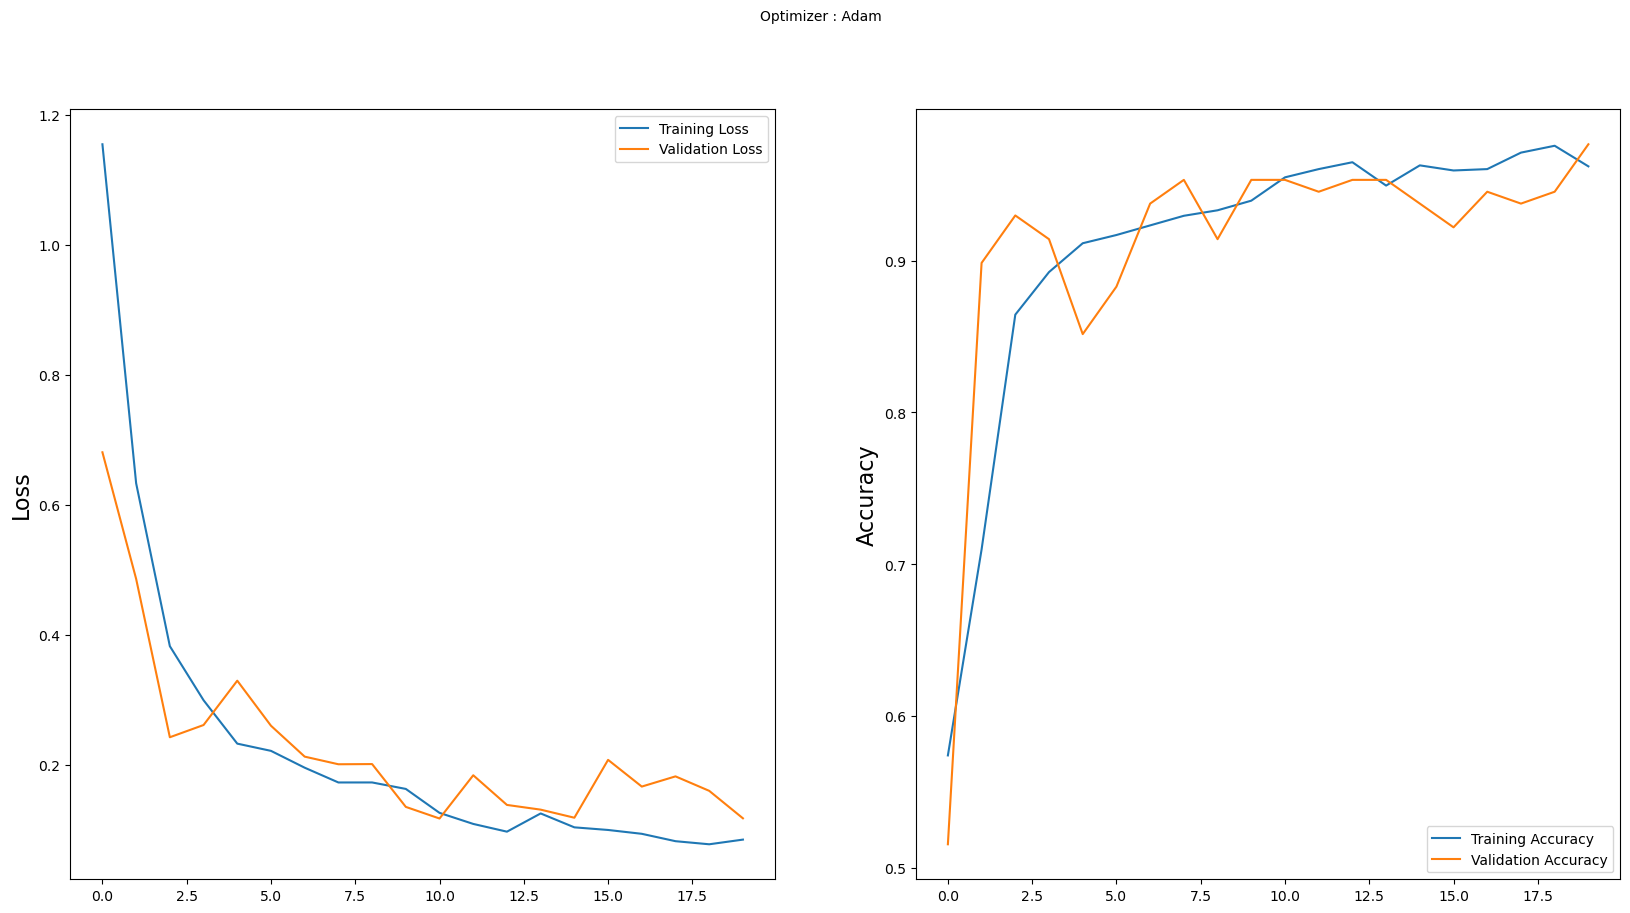

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [32]:
img=image.load_img(r"C:\Users\ajars\Downloads\photo_2023-11-20_00-10-25.jpg", target_size= (256,256), color_mode="grayscale")
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [33]:
pred=np.argmax(model.predict(x))
pred

1/1 [==============================] - 0s 30ms/step


0

In [34]:
if pred == 0:
    print("closed eye")
else:
    print("open eye")

closed eye
